In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/bike_sharing.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data = data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [ ]:
data = data.drop(columns = ['instant' , 'dteday' , 'year'])

In [ ]:
cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

In [ ]:
df_oh = data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data



for col in cols:
    df_oh = one_hot_encoding(df_oh, col)

In [ ]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)

In [ ]:
y = df_oh['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
regressor= RandomForestRegressor()
regressor.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
error = y_test - y_pred

Text(0, 0.5, 'Error')

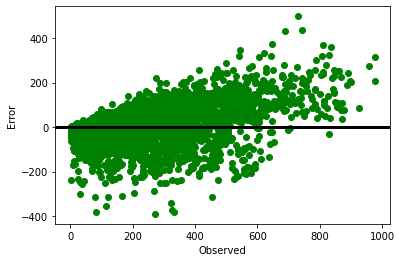

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, error ,color = 'green')
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

77.56633370100454